In [16]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [3]:
df=pd.read_csv("SampleSuperstore.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
print('Total rows:', df.shape[0])
print('Total columns:', df.shape[1])

Total rows: 9994
Total columns: 13


In [7]:
df.isnull().sum(axis = 0).to_frame()

,0
Ship Mode,0
Segment,0
Country,0
City,0
State,0
Postal Code,0
Region,0
Category,0
Sub-Category,0
Sales,0


In [8]:
df.dtypes.to_frame()

,0
Ship Mode,object
Segment,object
Country,object
City,object
State,object
Postal Code,int64
Region,object
Category,object
Sub-Category,object
Sales,float64


In [9]:
state_code = {'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC','North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT','Virginia': 'VA','District of Columbia': 'WA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'}
df['state_code'] = df.State.apply(lambda x: state_code[x])

In [10]:
state_data = df[['Sales', 'Profit', 'state_code']].groupby(['state_code']).sum()


fig = go.Figure(data=go.Choropleth(
    locations=state_data.index, 
    z = state_data.Sales, 
    locationmode = 'USA-states', 
    colorscale = 'Reds',
    colorbar_title = 'Sales in USD',
))

fig.update_layout(
    title_text = 'Total State-Wise Sales',
    geo_scope='usa',
    height=800,
)

fig.show()

In [11]:
fig = go.Figure(data=go.Choropleth(
    locations=state_data.index, # Spatial coordinates
    z = state_data.Profit, # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = [[0, 'rgb(255,0,0)'], [0.25, 'rgb(255,255,255)'], [0.45, 'rgb(124,208,247)'], [0.6, 'rgb(97,255,140)'], [1, 'rgb(8,181,0)']],
#     reversescale = True,
    colorbar_title = 'Profits in USD',
))

fig.update_layout(
    title_text = 'Total State-Wise Profit/Loss',
    geo_scope='usa', # limite map scope to USA
    height=600,
)

fig.show()

In [12]:
def state_data_viewer(states):
    """Plots the turnover generated by different product categories and sub-categories for the list of given states.
    Args:
        states- List of all the states you want the plots for
    Returns:
        None
    """
    product_data = df.groupby(['State'])
    for state in states:
        data = product_data.get_group(state).groupby(['Category'])
        fig, ax = plt.subplots(1, 3, figsize = (28,5))
        fig.suptitle(state, fontsize=14)        
        ax_index = 0
        for cat in ['Furniture', 'Office Supplies', 'Technology']:
            cat_data = data.get_group(cat).groupby(['Sub-Category']).sum()
            sns.barplot(x = cat_data.Profit, y = cat_data.index, ax = ax[ax_index])
            ax[ax_index].set_ylabel(cat)
            ax_index +=1
        fig.show()

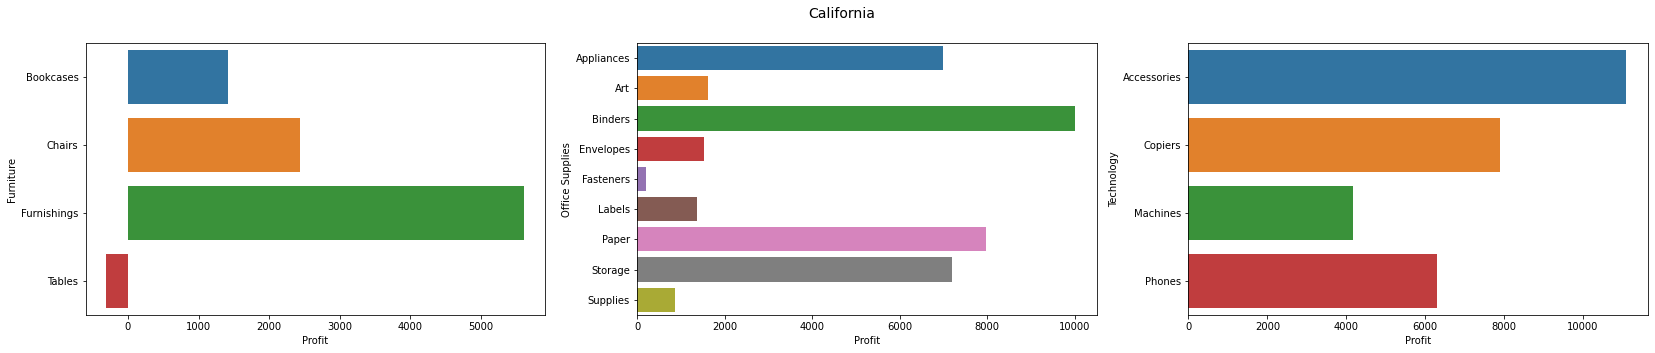

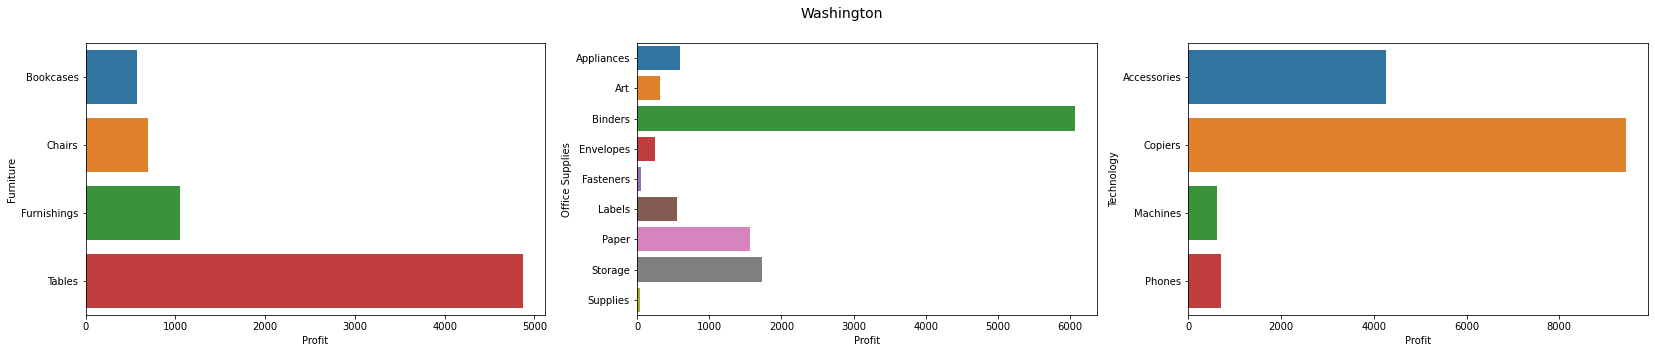

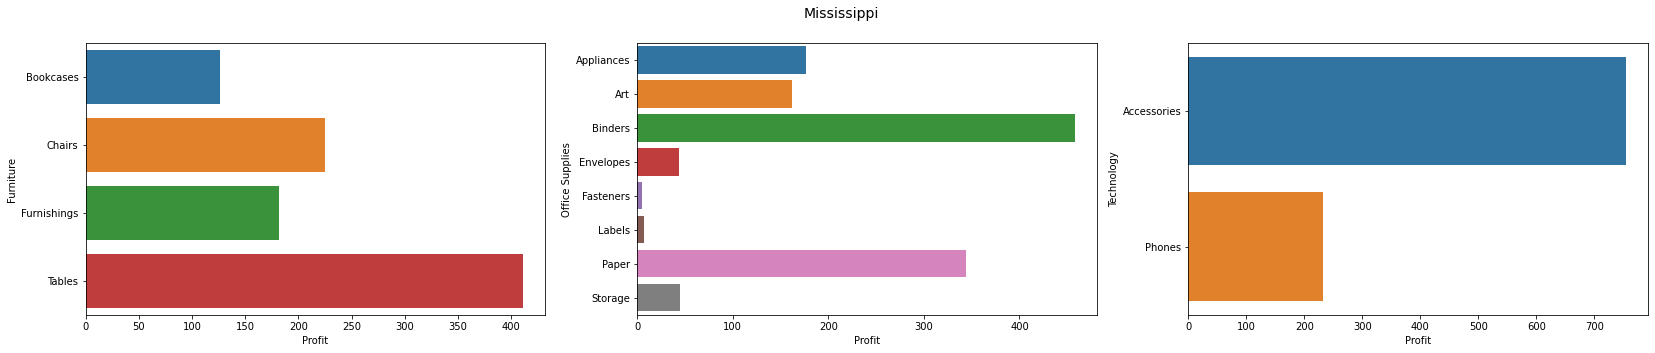

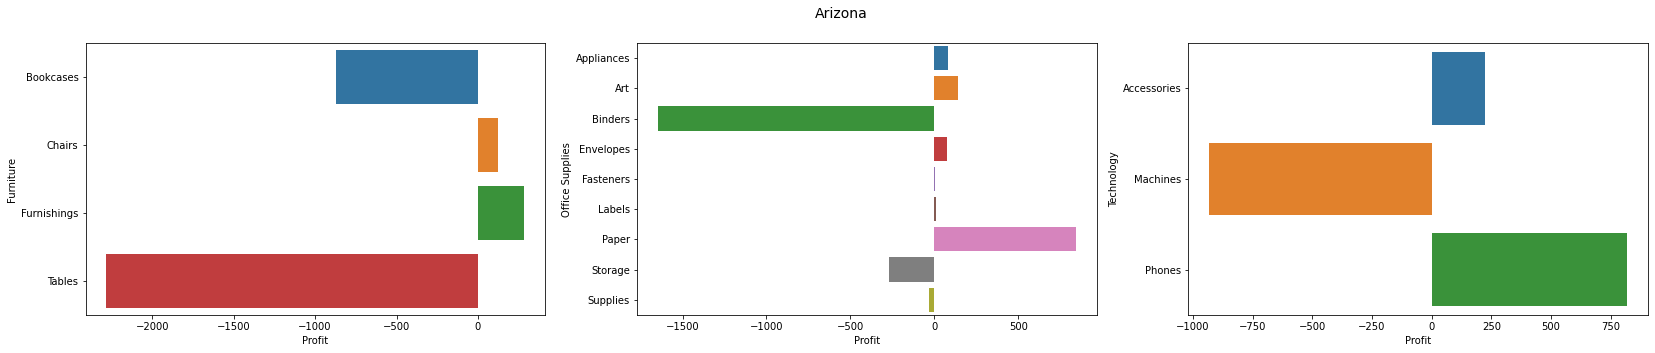

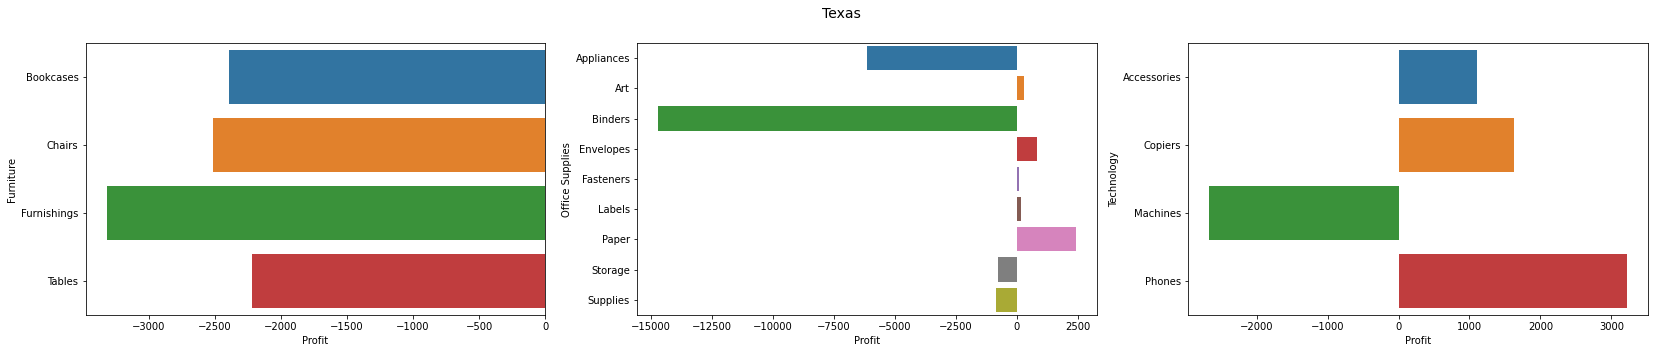

In [13]:
states = ['California', 'Washington', 'Mississippi', 'Arizona', 'Texas']
state_data_viewer(states)

In [17]:
df['price_per_product'] = df.Sales / df.Quantity
df['profit_per_product'] = df.Profit / df.Quantity 

data = df.groupby(['Category'])

for cat, df in data:
    sizes = np.absolute(df.price_per_product)
    fig = px.scatter(df, x = 'price_per_product', title = cat.upper(), 
                    color = 'Sub-Category',
                    size = sizes, hover_data=['Sub-Category'])
    fig.update_layout(
        height = 500,
        xaxis = dict(title='Price Per Product'),
        yaxis = dict(title=''),
    )
    fig.show()

In [18]:
for cat, df in data:
    sizes = np.absolute(df.profit_per_product)
    fig = px.scatter(df, x = 'profit_per_product', title = cat.upper(), 
                    color = 'Sub-Category',
                    size = sizes, hover_data=['Sub-Category'])
    fig.update_layout(
        autosize = True,
        height = 500,
        xaxis = dict(title='Profit/Loss Per Product'),
        yaxis = dict(title=''),
    )
    fig.show()

In [19]:
for cat, df in data:
    subCat = df.groupby(['Sub-Category']).sum()
    fig = px.bar(subCat, y = 'Profit', title = cat.upper(), 
                    color = subCat.index)
    fig.update_layout(
        autosize = True,
        width = 600,
        yaxis = dict(title='Profit/Loss Per Product Sub-Category'),
        xaxis = dict(title=''),
    )
    fig.show()

In [20]:
ship_segment = df.groupby(['Segment'])
segment_list = df.Segment.value_counts().index
cat_list = df.Category.value_counts().index

for segment in segment_list:
    seg_shipping = ship_segment.get_group(segment)
    standard, second, first, same = [], [], [], []
    for cat in cat_list:
        count = seg_shipping.groupby(['Category']).get_group(cat)['Ship Mode'].value_counts()
        standard.append(count[0]), second.append(count[1]), first.append(count[2]), same.append(count[3])
        
        fig = go.Figure()
    fig.add_trace(go.Bar(x = cat_list,y = standard,name='Standard Class',marker_color='rgb(137,51,51)'
                        ))
    fig.add_trace(go.Bar(x = cat_list,y = second,name='Second Class',marker_color='rgb(234,84,84)'
                        ))
    fig.add_trace(go.Bar(x = cat_list,y = first,name='First Class',marker_color='rgb(250,127,78)'
                        ))
    fig.add_trace(go.Bar(x = cat_list,y = same,name='Same Day',marker_color='lightsalmon'
                        ))

    fig.update_layout(
        barmode ='group',
        width = 600,
        title = segment.upper(),
        yaxis = dict(title = 'Number of Deliveries'))
    fig.show()

In [21]:
df['loss'] = df.Profit.apply(lambda x: x if (x < 0) else 0)

fig = px.bar( df,x = 'Ship Mode', y = 'loss', title = 'Losses in Each Shipping Category'.upper(), 
                    color = 'Ship Mode', hover_data=['loss', 'Sub-Category'])
fig.update_layout(
        autosize = True,
        width = 800,
        yaxis = dict(title='Total Loss'),
        xaxis = dict(title='Shipping Class'),
    )
fig.show()

In [22]:
df['whether_discount'] = df.Discount.apply(lambda x: 'No Discount' if (x == 0) else 'Discount')

discount_data = df.groupby(['whether_discount']).mean()

def discount_plotter(data_type = 'total'):
    """Plots discount data related plots.
    Args:
        data_type- 'total' or 'average', depending on you want the average statistics or total stats.
    """
    color = ['rgb(81,81,246)', 'rgb(209,70,70)']
    if data_type == 'average':
        discount_data = df.groupby(['whether_discount']).mean()
        fig = make_subplots(rows=1, cols=3, subplot_titles=('AVERAGE SALE', 'AVERAGE PROFIT/LOSS', 'AVERAGE PRICE PER PRODUCT'))
    else:
        discount_data = df.groupby(['whether_discount']).sum()
        fig = make_subplots(rows=1, cols=3, subplot_titles=('TOTAL SALE', 'TOTAL PROFIT/LOSS', 'TOTAL PRICE PER PRODUCT'))
    fig.add_trace(
        go.Bar(x = discount_data.index, y = discount_data.Sales, marker_color = color),
            row=1, col=1
    )
    
    fig.add_trace(
        go.Bar(x = discount_data.index, y = discount_data.Profit, marker_color = color),
            row=1, col=2
    )

    fig.add_trace(
        go.Bar(x = discount_data.index, y = discount_data.price_per_product, marker_color = color),
            row=1, col=3
    )
    fig.update_layout(showlegend=False)
    fig.show()
    
discount_plotter('average')
discount_plotter()